In [1]:
%config IPCompleter.greedy=True

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | pevek
Processing Record 3 of Set 1 | severnyy
Processing Record 4 of Set 1 | cherskiy
Processing Record 5 of Set 1 | teeli
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | palaiokhora
City not found. Skipping...
Processing Record 9 of Set 1 | libreville
Processing Record 10 of Set 1 | lakhimpur
Processing Record 11 of Set 1 | mujiayingzi
Processing Record 12 of Set 1 | peterhead
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | grindavik
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | ler
Processing Record 17 of Set 1 | shenjiamen
Processing Record 18 of Set 1 | ostrovnoy
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | hofn
Processing Record 22 of Set 1 | minab
Processing Record 23 of Set 1 | georgetown
Pr

Processing Record 41 of Set 4 | yerbogachen
Processing Record 42 of Set 4 | nador
Processing Record 43 of Set 4 | saskylakh
Processing Record 44 of Set 4 | cabo san lucas
Processing Record 45 of Set 4 | kupang
Processing Record 46 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 47 of Set 4 | puerto carreno
Processing Record 48 of Set 4 | natal
Processing Record 49 of Set 4 | ribeira grande
Processing Record 50 of Set 4 | panalingaan
Processing Record 1 of Set 5 | batagay
Processing Record 2 of Set 5 | araguari
Processing Record 3 of Set 5 | kudymkar
Processing Record 4 of Set 5 | at-bashi
Processing Record 5 of Set 5 | port elizabeth
Processing Record 6 of Set 5 | umm lajj
Processing Record 7 of Set 5 | ouadda
Processing Record 8 of Set 5 | tokur
Processing Record 9 of Set 5 | cockburn town
Processing Record 10 of Set 5 | doume
Processing Record 11 of Set 5 | saint anthony
Processing Record 12 of Set 5 | bargal
City not found. Skipping...
Processing Record 13 of Set 5 | khatanga

Processing Record 24 of Set 8 | ambilobe
Processing Record 25 of Set 8 | makat
Processing Record 26 of Set 8 | crestview
Processing Record 27 of Set 8 | goderich
Processing Record 28 of Set 8 | la romana
Processing Record 29 of Set 8 | ushirombo
Processing Record 30 of Set 8 | channel-port aux basques
Processing Record 31 of Set 8 | mount isa
Processing Record 32 of Set 8 | novikovo
Processing Record 33 of Set 8 | pokrovsk
Processing Record 34 of Set 8 | san patricio
Processing Record 35 of Set 8 | bambanglipuro
Processing Record 36 of Set 8 | inhambane
Processing Record 37 of Set 8 | jaciara
Processing Record 38 of Set 8 | port blair
Processing Record 39 of Set 8 | grand gaube
Processing Record 40 of Set 8 | peskovka
Processing Record 41 of Set 8 | saint-prosper
Processing Record 42 of Set 8 | moron
Processing Record 43 of Set 8 | hasaki
Processing Record 44 of Set 8 | deputatskiy
Processing Record 45 of Set 8 | jiddah
City not found. Skipping...
Processing Record 46 of Set 8 | najran

Processing Record 10 of Set 12 | kashi
Processing Record 11 of Set 12 | podhum
Processing Record 12 of Set 12 | labutta
City not found. Skipping...
Processing Record 13 of Set 12 | dandong
Processing Record 14 of Set 12 | marsa matruh
Processing Record 15 of Set 12 | formoso do araguaia
City not found. Skipping...
Processing Record 16 of Set 12 | dulce grande
Processing Record 17 of Set 12 | nantucket
Processing Record 18 of Set 12 | gouyave
Processing Record 19 of Set 12 | ajdabiya
Processing Record 20 of Set 12 | tremedal
Processing Record 21 of Set 12 | trairi
Processing Record 22 of Set 12 | vaasa
Processing Record 23 of Set 12 | jesup
Processing Record 24 of Set 12 | utena
Processing Record 25 of Set 12 | morlaix
Processing Record 26 of Set 12 | gigmoto
Processing Record 27 of Set 12 | velikie luki
City not found. Skipping...
Processing Record 28 of Set 12 | mokhsogollokh
Processing Record 29 of Set 12 | gornyy
Processing Record 30 of Set 12 | uruzgan
Processing Record 31 of Set 1

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pevek,69.7008,170.3133,10.62,96,87,6.42,RU,2022-04-21 15:28:52
1,Severnyy,50.6770,36.5532,51.84,46,40,6.71,RU,2022-04-21 15:28:53
2,Cherskiy,68.7500,161.3000,15.39,97,100,2.86,RU,2022-04-21 15:28:53
3,Teeli,51.0333,90.2333,49.42,39,100,6.87,RU,2022-04-21 15:28:54
4,Ilulissat,69.2167,-51.1000,30.22,80,75,24.16,GL,2022-04-21 15:28:54
5,Tuktoyaktuk,69.4541,-133.0374,-7.60,77,40,0.00,CA,2022-04-21 15:28:55
6,Libreville,0.3925,9.4537,85.60,67,77,8.68,GA,2022-04-21 15:28:55
7,Lakhimpur,27.9500,80.7667,92.21,19,100,8.99,IN,2022-04-21 15:28:55
8,Mujiayingzi,42.1167,118.7833,42.22,64,83,18.01,CN,2022-04-21 15:28:56
9,Peterhead,57.5058,-1.7981,57.45,83,67,13.89,GB,2022-04-21 15:28:56


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [13]:
city_data_df = city_data_df[new_column_order]

In [14]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pevek,RU,2022-04-21 15:28:52,69.7008,170.3133,10.62,96,87,6.42
1,Severnyy,RU,2022-04-21 15:28:53,50.6770,36.5532,51.84,46,40,6.71
2,Cherskiy,RU,2022-04-21 15:28:53,68.7500,161.3000,15.39,97,100,2.86
3,Teeli,RU,2022-04-21 15:28:54,51.0333,90.2333,49.42,39,100,6.87
4,Ilulissat,GL,2022-04-21 15:28:54,69.2167,-51.1000,30.22,80,75,24.16
5,Tuktoyaktuk,CA,2022-04-21 15:28:55,69.4541,-133.0374,-7.60,77,40,0.00
6,Libreville,GA,2022-04-21 15:28:55,0.3925,9.4537,85.60,67,77,8.68
7,Lakhimpur,IN,2022-04-21 15:28:55,27.9500,80.7667,92.21,19,100,8.99
8,Mujiayingzi,CN,2022-04-21 15:28:56,42.1167,118.7833,42.22,64,83,18.01
9,Peterhead,GB,2022-04-21 15:28:56,57.5058,-1.7981,57.45,83,67,13.89


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import time module
import time

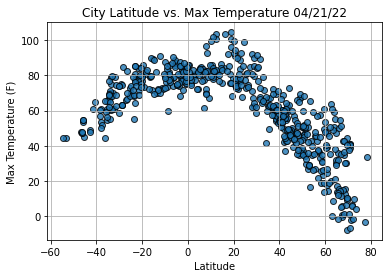

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

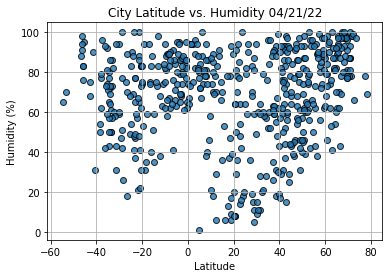

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

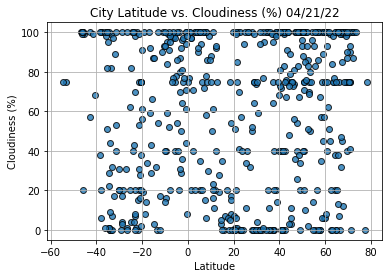

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

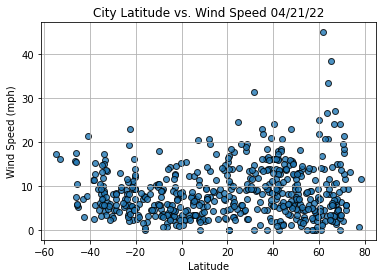

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

In [23]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

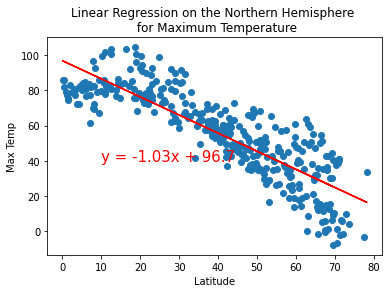

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

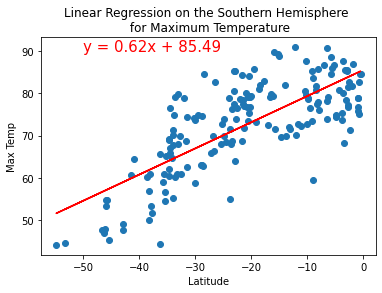

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

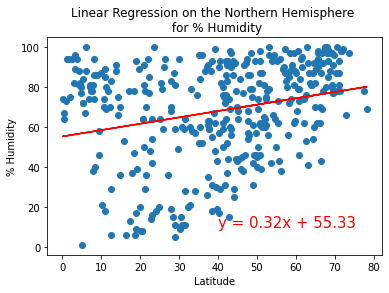

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

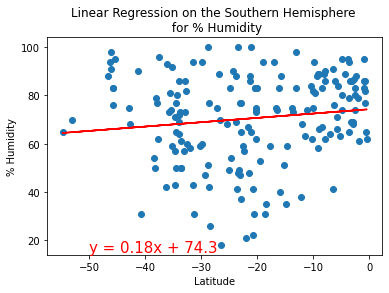

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

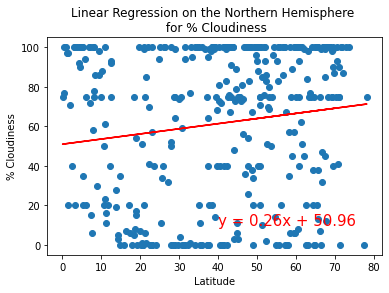

In [46]:
# Linear regression for Percent Cloudiness on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

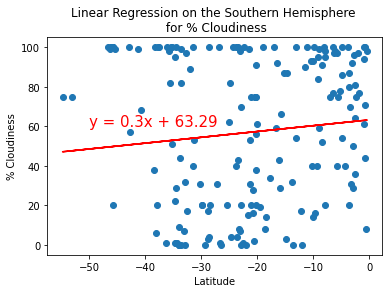

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

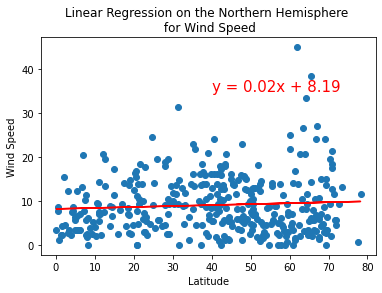

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

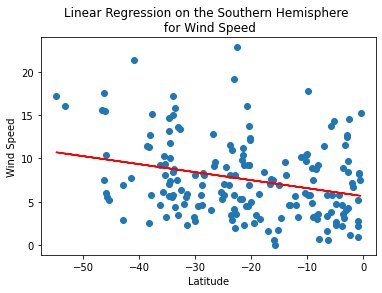

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))